In [43]:
import pandas as pd
from matplotlib import pyplot as pl
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
df.shape


(8124, 23)

#### Задание 2

In [45]:
df.drop_duplicates()
df.dropna()
df.shape

(8124, 23)

#### Задание 3

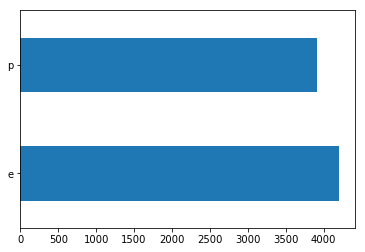

In [46]:
df['class'].value_counts().plot.barh()

Классы сбалансированны, следовательно предпочтительнее использовать ROC кривую, ибо PR кривая подходит для случаев с сильным дисбалансом классов.

#### Задание 4

Количественные признаки отсутствуют.

#### Задание 5

In [47]:
binary_features = {item: df[item].unique() for item in df.columns if len(df[item].unique()) == 2}
for key, value in binary_features.items():
    print(key, value)


class ['p' 'e']
bruises ['t' 'f']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
stalk-shape ['e' 't']


Разберём выбранные признаки:
 - bruises - исходя из readme действительно бинарный
 - gill-attachment - имеет 4 возможных варианта существования, но в выборке встречается только два значения -> можно считать бинарным
 - gill-spacing - имеет 3 возможных варианта -> та же ситуация, что и с предыдущим
 - gill-size - бинарный исходя из readme
 - stalk-shape - бинарный исходя из readme

Для всех вышеперечисленных признаков будем использовать бинарное кодирование. (Я понимаю, что в случае появления в тестовой выборке значения, которое не входит в множество обучающих значений псеводобинарных признаков будут проблемы и придётся проводить обучение заново, но поскольку тестовая выборка делается на основе документа, который был в задании таких значений не будет и мы можем пойти на такое допущение)

In [48]:
non_binary_features = {item: df[item].unique() for item in df.columns if len(df[item].unique()) > 2}
for key, value in non_binary_features.items():
    print(key, value)

cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Для всех вышеперечисленных признаков будем использовать dummy-кодирование.

In [49]:
for column in list(non_binary_features.keys()):
    df.loc[range(len(df[column])), column] = [hash(item) % len(non_binary_features[column]) for item in df[column]]
for column in list(binary_features.keys()):
    df[column] = df[column].map({item: list(binary_features[column]).index(item) for item in binary_features[column]})
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,4,0,7,0,0,0,6,...,0,5,5,p,1,0,0,0,2,6
1,1,0,0,6,0,0,0,0,1,6,...,0,5,5,p,1,0,0,1,4,0
2,1,3,0,3,0,0,0,0,1,4,...,0,5,5,p,1,0,0,1,4,6
3,0,0,2,3,0,7,0,0,0,4,...,0,5,5,p,1,0,0,0,2,6
4,1,0,0,2,1,1,0,1,1,6,...,0,5,5,p,1,0,3,1,3,0


Неожиданно заметил, что в выборке есть колонки, которые имеют константное значение.
Удалим их.

In [50]:
constant_features = {item: df[item].unique() for item in df.columns if len(df[item].unique()) == 1}
for key, value in constant_features.items():
    print(key, value)

veil-type ['p']


In [51]:
for column in list(constant_features.keys()):
    del df[column]
    
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,4,0,7,0,0,0,6,...,0,0,5,5,1,0,0,0,2,6
1,1,0,0,6,0,0,0,0,1,6,...,0,0,5,5,1,0,0,1,4,0
2,1,3,0,3,0,0,0,0,1,4,...,0,0,5,5,1,0,0,1,4,6
3,0,0,2,3,0,7,0,0,0,4,...,0,0,5,5,1,0,0,0,2,6
4,1,0,0,2,1,1,0,1,1,6,...,0,0,5,5,1,0,3,1,3,0


#### Задание 6

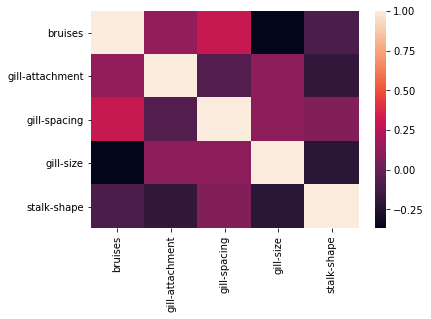

In [52]:
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr)
pl.show()


In [53]:
corr


,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape
bruises,1.000000,0.137359,0.299473,-0.369596,-0.099364
gill-attachment,0.137359,1.000000,-0.071489,0.108984,-0.186485
gill-spacing,0.299473,-0.071489,1.000000,0.108333,0.080895
gill-size,-0.369596,0.108984,0.108333,1.000000,-0.214576
stalk-shape,-0.099364,-0.186485,0.080895,-0.214576,1.000000


#### Задание 7

#### Задание 8

In [54]:
x, y = df.drop('class', axis=1), df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


In [55]:
d_tree = tree.DecisionTreeClassifier()
score = d_tree.fit(x_train, y_train)

In [56]:
Y_score = d_tree.predict(x_test)
accuracy_score(Y_score, y_test)



1.0

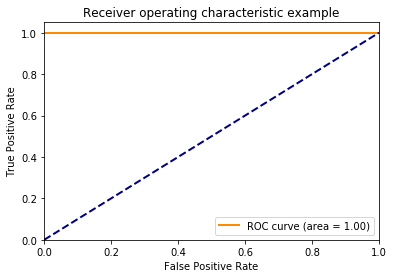

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, Y_score)
roc_auc = auc(fpr, tpr)

pl.figure()
lw = 2
pl.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()



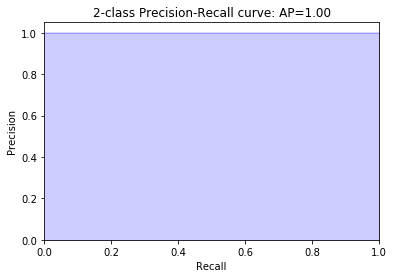

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision = average_precision_score(y_test, Y_score)
precision, recall, _ = precision_recall_curve(y_test, Y_score)

pl.step(recall, precision, color='b', alpha=0.2, where='post')
pl.fill_between(recall, precision, step='post', alpha=0.2, color='b')

pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


#### Персептрон

In [59]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Perceptron

prcp = Perceptron()
paramsearch = GridSearchCV(estimator=prcp, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [(x + 1) for x in range(55)]
}, n_jobs=-1)
paramsearch.fit(x_train, y_train)

best_score = paramsearch.best_score_
best_alpha = paramsearch.best_estimator_.alpha
best_max_iter = paramsearch.best_estimator_.max_iter

print('Best score: ', best_score)
print('Best alpha: ', best_alpha)
print('Best iter: ', best_max_iter)




C:\IntelPython3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Best score:  0.981885332395357
Best alpha:  0.0526315789474
Best iter:  50


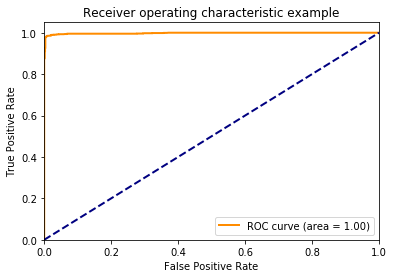

In [60]:
Y_score = paramsearch.best_estimator_.fit(x_train, y_train).decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_score)
roc_auc = auc(fpr, tpr)

pl.figure()
lw = 2
pl.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()


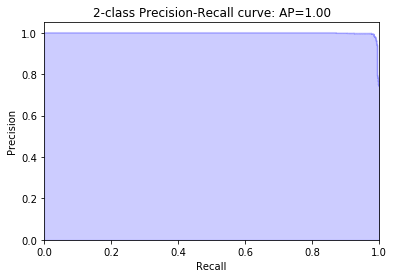

In [61]:
average_precision = average_precision_score(y_test, Y_score)
precision, recall, _ = precision_recall_curve(y_test, Y_score)

pl.step(recall, precision, color='b', alpha=0.2, where='post')
pl.fill_between(recall, precision, step='post', alpha=0.2, color='b')

pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
